---
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RandyRDavila/Data_Science_and_Machine_Learning_Spring_2022/blob/main/Lecture_6/Lecture_6_2.ipynb)

 <h1 align="center">Linear regression</h1>

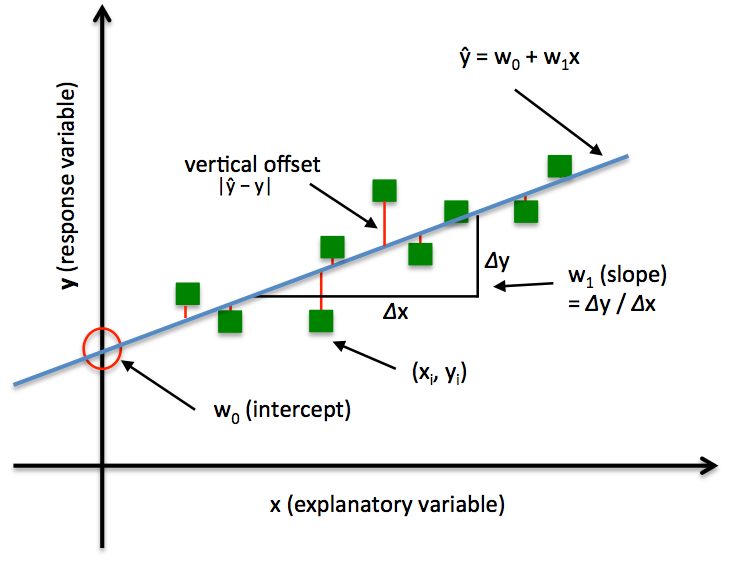


Machine learning, more specifically the field of predictive modeling is primarily concerned with minimizing the error of a model or making the most accurate predictions possible, at the expense of explainability. In applied machine learning we will borrow, reuse and steal algorithms from many different fields, including statistics and use them towards these ends.

As such, linear regression was developed in the field of statistics and is studied as a model for understanding the relationship between input and output numerical variables, but has been borrowed by machine learning. It is both a statistical algorithm and a machine learning algorithm.


Linear regression is an attractive model because the representation is simple. The representation is a linear equation that combines a specific set of input values (x) the solution to which is the predicted output for that set of input values (y). As such, both the input values (x) and the output value are numeric.

The linear equation assigns one scale factor to each input value or column, called a coefficient and represented by the capital Greek letter Beta (B). One additional coefficient is also added, giving the line an additional degree of freedom (e.g. moving up and down on a two-dimensional plot) and is often called the intercept or the bias coefficient.

                                                                                                Source: www.medium.com


# Task
This project analyzes the data on the quality of Arabica coffee, with the aim of finding a relationship between coffee production parameters and the results of cup quality evaluation. The scikit-learn linear regression model will be used and the main parameters will be analyzed according to the PCA analysis carried out in the previous project.

## Cool Coffee Fact. Aroma

Coffee is considered one of the most aromatic foods in the world despite the fact that freshly picked green coffee beans have practically no aroma. The compounds responsible for its smell and taste are already present in the seed, but they can't get out yet.

With roasting, the aromas of the coffee are released. The composition changes, the carbohydrates, proteins and acids of the green grains are transformed into volatile compounds thanks to the heat. Among these volatile compounds are oxazole and pyrazine are the two main responsible for the characteristic aroma of coffee. Actually, more than 900 different volatile components are released, but only a part of these particles are perceptible by our senses.

### Linear Regression



In [1]:
#List of lybraries used in this project
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import numpy as np 
import pandas as pd 
import seaborn as sns

### Extracting data from Total cup points and altitude mean meters

In [22]:
cafe_final = pd.read_csv("coffee_data.csv") 
X = cafe_final.drop('Total.Cup.Points', axis = 1)
y = cafe_final['Total.Cup.Points']
#15% of the data for test, 85 % for training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
#print(len(X_train), len(X_test), len(y_train), len(y_test))
X_train_alt =np.array(X_train['altitude_mean_meters']).reshape(-1,1)
y_train_alt = np.array(y_train).reshape(-1,1)

### Creating the linear regression function

In [31]:
def linear_reg_val(X_train, y_train):
    
    linreg.fit(X_train, y_train)
    # Evaluate using rmse
    scores = cross_val_score(
                linreg, 
                X_train,
                y_train,
                cv=10,
                scoring="neg_mean_squared_error"
    )

    linreg_score =linreg.score(X_train, y_train)
    rmse_scores = np.sqrt(-scores)
    print ('Rmse_scores:', rmse_scores)
    print ('Rmse_scores.mean:',rmse_scores.mean())
    print ('Rmse_scores.std:', rmse_scores.std())
    print ('Intercept:',linreg.intercept_)
    print ('Slope:',linreg.coef_)
    print ('Score:', linreg_score)


### Getting and ploting the final results

**Altitude**

Rmse_scores: [3.17590326 2.06786682 3.09585679 1.98546178 3.44317065 2.8347049
 1.93636971 2.57913439 2.50303223 2.37943994]
Rmse_scores.mean: 2.600094046535608
Rmse_scores.std: 0.5003273474821489
Intercept: 80.34884436336777
Slope: [0.00135415]
Score: 0.042674216525398934


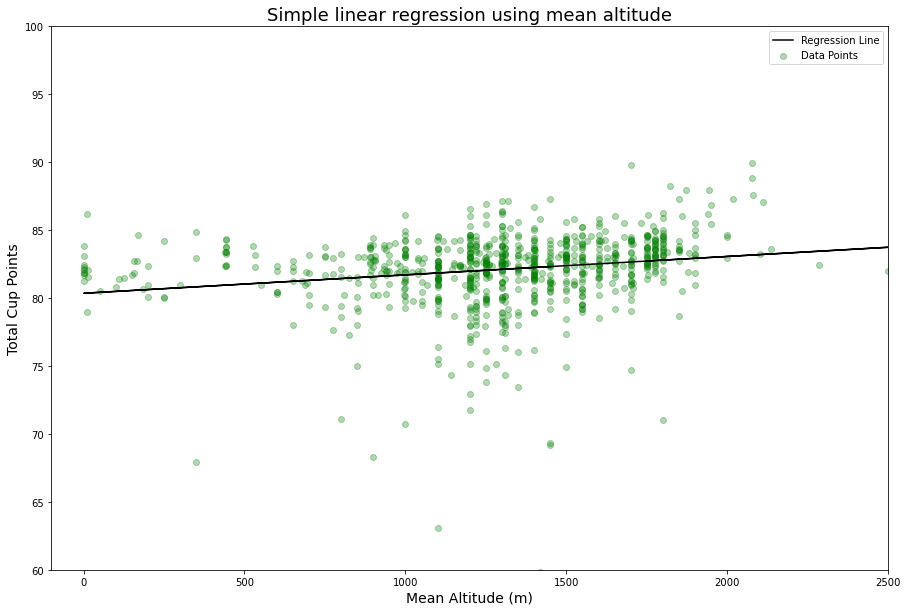

In [32]:
linreg = LinearRegression()
linear_reg_val(X_train_alt, y_train)
y_pred_alt = linreg.predict(X_train_alt)
# Get predictions

# Fit on training data
linreg.fit(X_train_alt, y_train)

# Plot data points
plt.figure(figsize = (15,10))
plt.scatter(x = X_train_alt[:2000], y = y_train[:2000], alpha = 0.3, label = 'Data Points', color = 'green')
plt.gca().set(xlim=(-100.0, 2500), ylim=(60, 100) )
# Plot regression line
plt.plot(X_train_alt, y_pred_alt, color = 'black', label = 'Regression Line')
plt.legend()
plt.title('Simple linear regression using mean altitude', fontsize = 18)
plt.xlabel('Mean Altitude (m)', fontsize = 14)
plt.ylabel('Total Cup Points', fontsize = 14)
plt.show()
plt.close()

**Aftertaste**

Rmse_scores: [1.45701573 1.10406743 1.91061498 1.27193461 2.25467953 1.3716617
 1.0993938  1.38566681 1.16062217 1.44151086]
Rmse_scores.mean: 1.4457167611783568
Rmse_scores.std: 0.35041827092344313
Intercept: [31.98602168]
Slope: [[6.78652226]]
Score: 0.6985755437721377


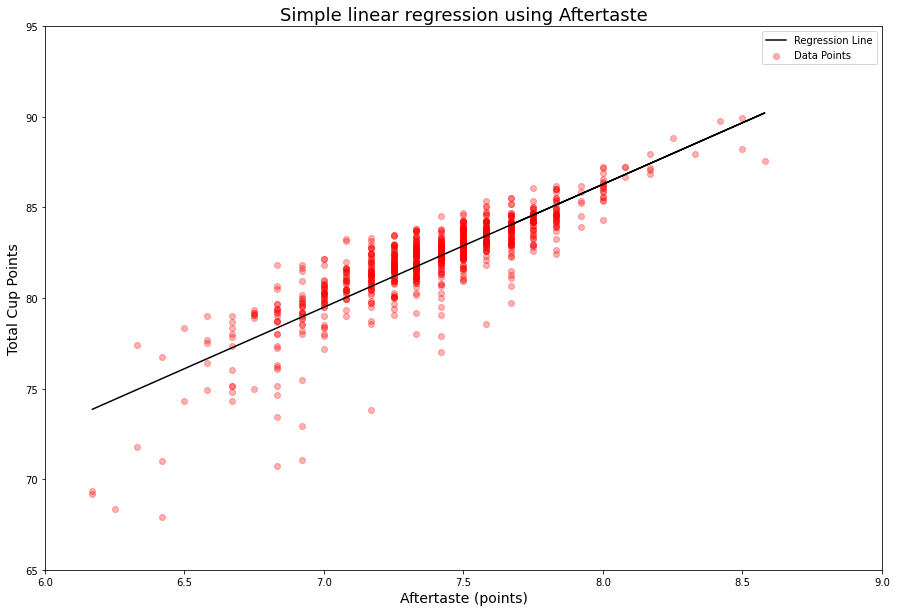

In [34]:
linreg = LinearRegression()
X_train_aro =np.array(X_train['Aftertaste']).reshape(-1,1)
y_train_aro=y_train_alt
linear_reg_val(X_train_aro, y_train_aro)

    # Fit on training data
linreg.fit(X_train_aro, y_train_aro)

y_pred_aro = linreg.predict(X_train_aro)
# Get predictions

# Plot data points
plt.figure(figsize = (15,10))
plt.scatter(x = X_train_aro[:2000], y = y_train_aro[:2000], alpha = 0.3, label = 'Data Points', color = 'red')
plt.gca().set(xlim=(6, 9), ylim=(65, 95) )
# Plot regression line
plt.plot(X_train_aro, y_pred_aro, color = 'black', label = 'Regression Line')
plt.legend()
plt.title('Simple linear regression using Aftertaste', fontsize = 18)
plt.xlabel('Aftertaste (points)', fontsize = 14)
plt.ylabel('Total Cup Points', fontsize = 14)
plt.show()
plt.close()

**Aroma**

Rmse_scores: [2.16047704 1.33951938 2.44167275 2.32132082 2.81884025 1.63900841
 1.26629566 1.97340109 1.89182652 1.62610686]
Rmse_scores.mean: 1.9478468767378279
Rmse_scores.std: 0.4716408994373331
Intercept: [37.10470683]
Slope: [[5.94769586]]
Score: 0.4608091674583933


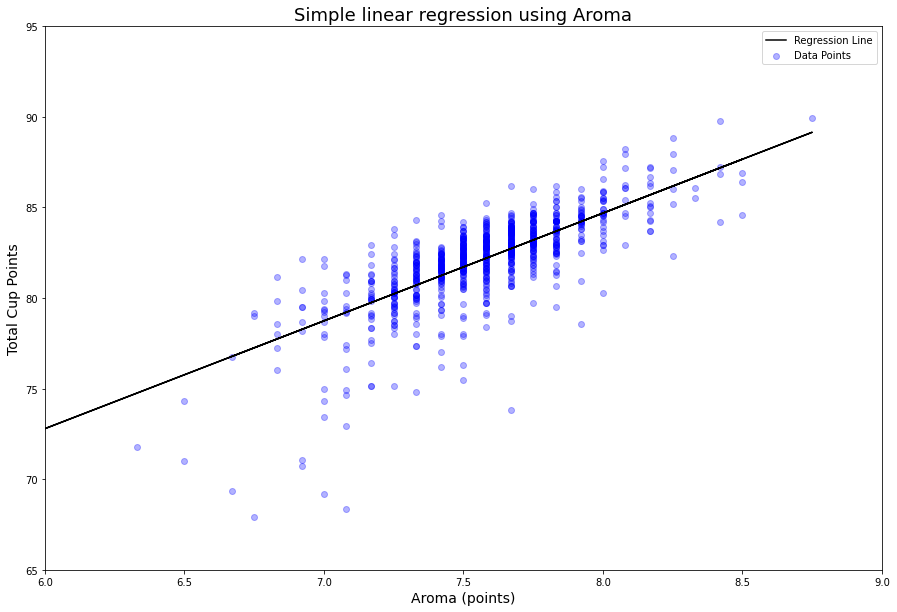

In [35]:
X_train_aro =np.array(X_train['Aroma']).reshape(-1,1)
y_train_aro=y_train_alt
linear_reg_val(X_train_aro, y_train_aro)
linreg = LinearRegression()
    # Fit on training data
linreg.fit(X_train_aro, y_train_aro)

y_pred_aro = linreg.predict(X_train_aro)
# Get predictions

# Plot data points
plt.figure(figsize = (15,10))
plt.scatter(x = X_train_aro[:2000], y = y_train_aro[:2000], alpha = 0.3, label = 'Data Points', color = 'blue')
plt.gca().set(xlim=(6, 9), ylim=(65, 95) )
# Plot regression line
plt.plot(X_train_aro, y_pred_aro, color = 'black', label = 'Regression Line')
plt.legend()
plt.title('Simple linear regression using Aroma', fontsize = 18)
plt.xlabel('Aroma (points)', fontsize = 14)
plt.ylabel('Total Cup Points', fontsize = 14)
plt.show()
plt.close()

**Body**

Rmse_scores: [2.03233528 1.60632047 2.22708048 1.705339   2.93776008 1.9789199
 1.44844727 2.09682097 1.88732045 1.83439944]
Rmse_scores.mean: 1.975474335146616
Rmse_scores.std: 0.3901215188800408
Intercept: [32.47733907]
Slope: [[6.61183792]]
Score: 0.4463505060865465


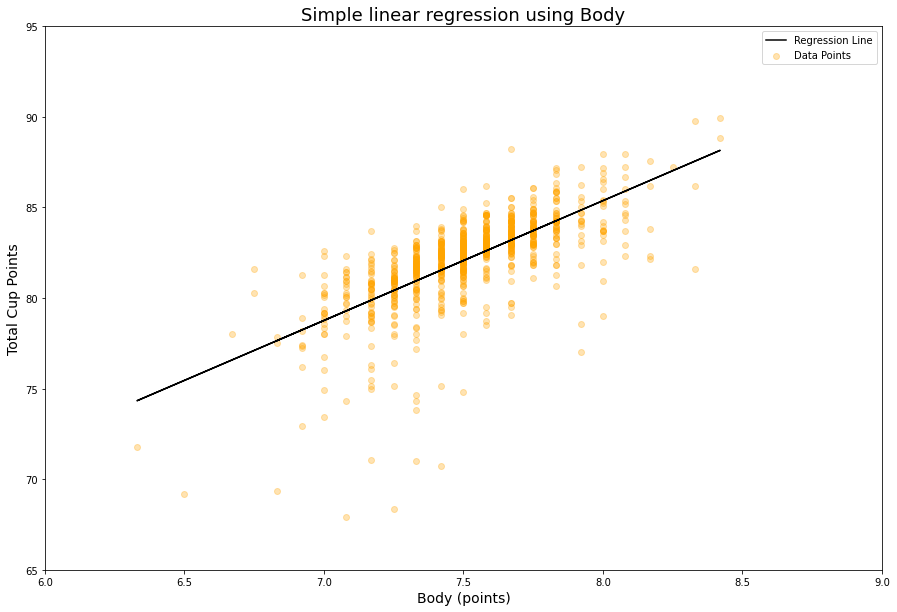

In [36]:
linreg = LinearRegression()
X_train_aro =np.array(X_train['Body']).reshape(-1,1)
y_train_aro=y_train_alt
linear_reg_val(X_train_aro, y_train_aro)

    # Fit on training data
linreg.fit(X_train_aro, y_train_aro)

y_pred_aro = linreg.predict(X_train_aro)
# Get predictions

# Plot data points
plt.figure(figsize = (15,10))
plt.scatter(x = X_train_aro[:2000], y = y_train_aro[:2000], alpha = 0.3, label = 'Data Points', color = 'orange')
plt.gca().set(xlim=(6, 9), ylim=(65, 95) )
# Plot regression line
plt.plot(X_train_aro, y_pred_aro, color = 'black', label = 'Regression Line')
plt.legend()
plt.title('Simple linear regression using Body', fontsize = 18)
plt.xlabel('Body (points)', fontsize = 14)
plt.ylabel('Total Cup Points', fontsize = 14)
plt.show()
plt.close()

**Balance**

Rmse_scores: [1.61895684 1.14493921 1.92111275 1.43888925 2.34366893 1.69800262
 1.24703802 1.77428552 1.79957541 1.6804032 ]
Rmse_scores.mean: 1.6666871738828313
Rmse_scores.std: 0.32495208405249404
Intercept: [35.67921534]
Slope: [[6.18992106]]
Score: 0.6094273543082188


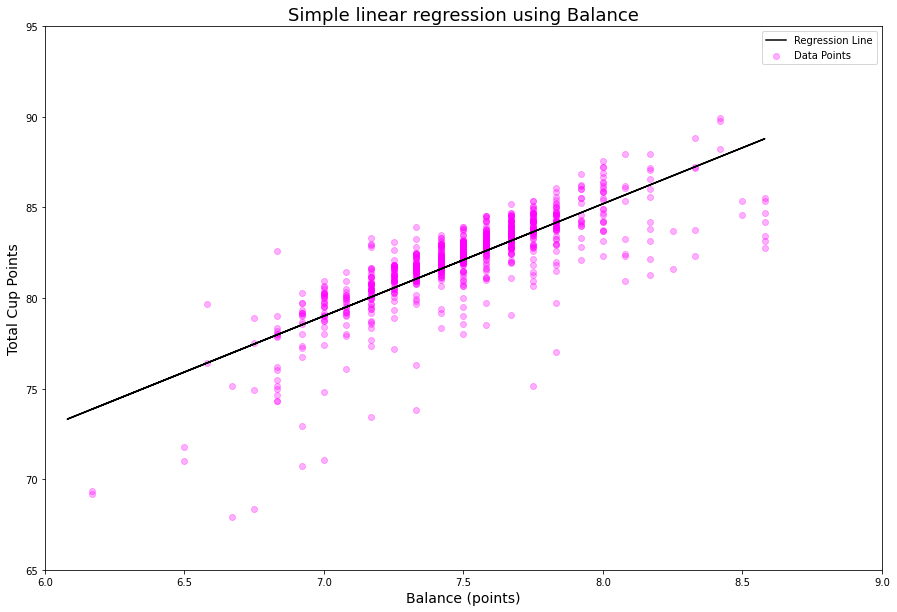

In [37]:
linreg = LinearRegression()
X_train_aro =np.array(X_train['Balance']).reshape(-1,1)
y_train_aro=y_train_alt
linear_reg_val(X_train_aro, y_train_aro)
# Fit on training data
linreg.fit(X_train_aro, y_train_aro)

y_pred_aro = linreg.predict(X_train_aro)
# Get predictions

# Plot data points
plt.figure(figsize = (15,10))
plt.scatter(x = X_train_aro[:2000], y = y_train_aro[:2000], alpha = 0.3, label = 'Data Points', color = "magenta")
plt.gca().set(xlim=(6, 9), ylim=(65, 95) )
# Plot regression line
plt.plot(X_train_aro, y_pred_aro, color = 'black', label = 'Regression Line')
plt.legend()
plt.title('Simple linear regression using Balance', fontsize = 18)
plt.xlabel('Balance (points)', fontsize = 14)
plt.ylabel('Total Cup Points', fontsize = 14)
plt.show()
plt.close()

Rmse_scores: [1.38360702 1.07294823 1.90730488 1.12196819 2.16001255 1.43284388
 1.10401671 1.45884841 1.46804217 1.39227694]
Rmse_scores.mean: 1.4501868969893628
Rmse_scores.std: 0.3303272165112734
Intercept: [29.95963831]
Slope: [[6.94497239]]
Score: 0.6982352218682149


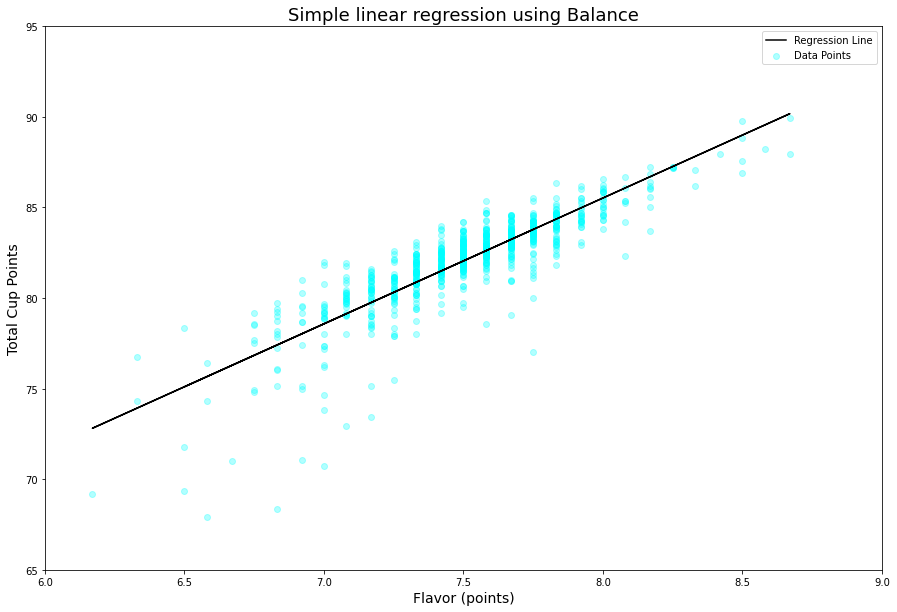

In [38]:
linreg = LinearRegression()
X_train_aro =np.array(X_train['Flavor']).reshape(-1,1)
y_train_aro=y_train_alt
linear_reg_val(X_train_aro, y_train_aro)
# Fit on training data
linreg.fit(X_train_aro, y_train_aro)

y_pred_aro = linreg.predict(X_train_aro)
# Get predictions

# Plot data points
plt.figure(figsize = (15,10))
plt.scatter(x = X_train_aro[:2000], y = y_train_aro[:2000], alpha = 0.3, label = 'Data Points', color = "cyan")
plt.gca().set(xlim=(6, 9), ylim=(65, 95) )
# Plot regression line
plt.plot(X_train_aro, y_pred_aro, color = 'black', label = 'Regression Line')
plt.legend()
plt.title('Simple linear regression using Balance', fontsize = 18)
plt.xlabel('Flavor (points)', fontsize = 14)
plt.ylabel('Total Cup Points', fontsize = 14)
plt.show()
plt.close()

Linear regressions of the six most important parameters according to PCA analysis could be performed. The higher scores were flavor and balance. Although the slope of the altitude is lower compared to the other parameters, this parameter is very important since it is the only one available from the previous coffee production processes. For this reason, it will remain constant in the following analyzes that will be more focused on the classification work.